In [1]:
import pandas as pd
import numpy as np
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("bostonh.dat", sep = "\s+", header=None)

In [3]:
# transform data
#xt = data.copy()
xt = pd.DataFrame(columns = range(14))
for i in [0, 2, 4, 5, 7, 8, 9, 13]:
    xt.iloc[:, i] = np.log(data.iloc[:, i])
    
xt.iloc[:, 1] = data.iloc[:, 1]/10
xt.iloc[:, 3] = data.iloc[:, 3]
xt.iloc[:, 6] = (data.iloc[:, 6]**(2.5))/10000
xt.iloc[:, 10] = np.exp(0.4 * data.iloc[:, 10])/1000
xt.iloc[:, 11] = data.iloc[:, 11]/100
xt.iloc[:, 12] = np.sqrt(data.iloc[:, 12])
data = xt.drop(3, axis = 1)

da = (data - np.mean(data))/np.std(data, ddof = 1, axis = 0)
d = np.zeros([len(da),len(da)])

for i in range(0, len(da)):
    for j in range(0, len(da)):
        d[i, j] = np.linalg.norm(da.iloc[i, :] - da.iloc[j, :])

ddd  = d[1:, :-1][:, 0]
for i in range(1, len(da)-1):
    ddd = np.concatenate((ddd, d[1:, :-1][i:, i]))

In [4]:
w = hierarchy.linkage(ddd, 'ward')

In [5]:
tree = hierarchy.cut_tree(w, n_clusters = 2)

In [6]:
da["tree"] = tree

t1 = da[da["tree"] == 0].iloc[:, :-1]
t2 = da[da["tree"] == 1].iloc[:, :-1]

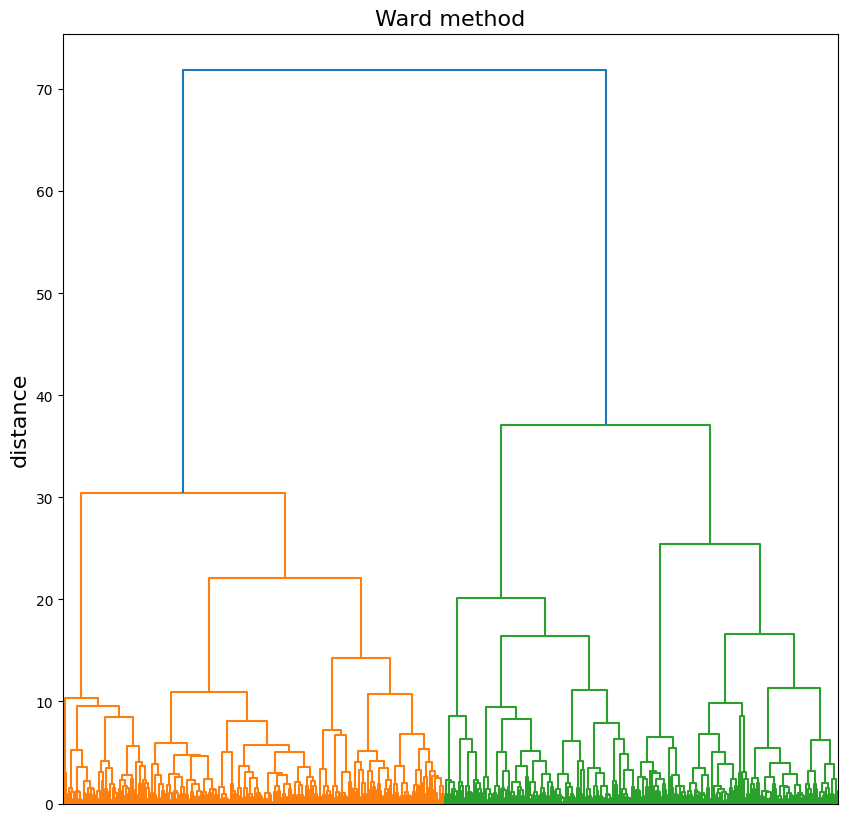

In [7]:
# Plot 1
fig, ax = plt.subplots(figsize = (10, 10))
h = hierarchy.dendrogram(w)
plt.title("Ward method", fontsize = 16)
plt.ylabel("distance", fontsize = 16)
ax.set_xticks([])
plt.show()

In [8]:
# means for Cluster 1 and Cluster 2
mc = np.vstack((np.mean(da[da["tree"] == 0]), np.mean(da[da["tree"] == 1])))
# standard deviations for Cluster 1 and Cluster 2
sc = np.vstack((np.std(da[da["tree"] == 0].values, ddof = 1),
                np.std(da[da["tree"] == 1].values, ddof = 1)))
# means and standard deviations of the 13 standardized variables for Cluster 1
# (249 observations) and Cluster 2 (257 observations)
tbl = np.vstack((mc[0,:], np.hstack(([sc[0,:]/np.sqrt(len(t1))] * len(mc.T))), 
                 mc[1,:], np.hstack(([sc[1,:]/np.sqrt(len(t2))] * len(mc.T)))))

In [9]:
# spectral decomposition
eva, eve = np.linalg.eig(da.iloc[:, :-1].cov())
eve = eve[:, :2]

dav = da.iloc[:, :-1] @ eve
dav["tr"] = tree

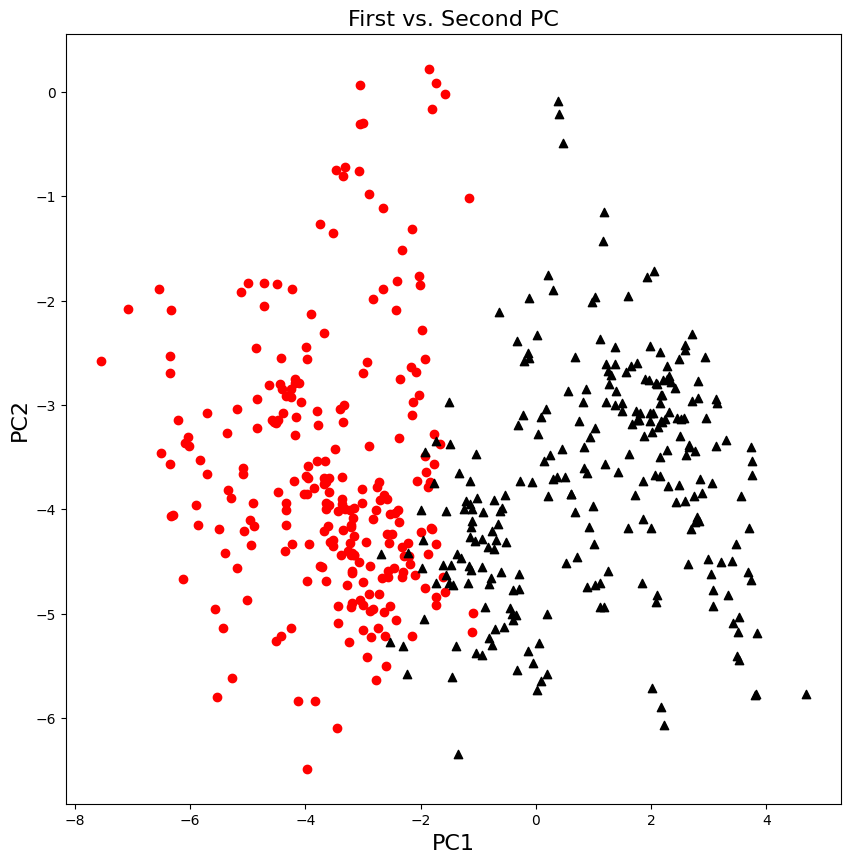

In [10]:
# Plot 2
fig, ax = plt.subplots(figsize = (10, 10))
ax.scatter(dav[dav["tr"] == 0][0], -dav[dav["tr"] == 0][1], c = "red")
ax.scatter(dav[dav["tr"] == 1][0], -dav[dav["tr"] == 1][1], c = "black", marker = "^")
plt.title("First vs. Second PC", fontsize = 16)
plt.xlabel("PC1", fontsize = 16)
plt.ylabel("PC2", fontsize = 16)
plt.show()

In [11]:
xt

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-5.064036,1.8,0.837248,0,-0.619897,1.883275,3.432567,1.408545,0.0,5.690359,0.454865,3.969,2.231591,3.178054
1,-3.600502,0.0,1.95586,0,-0.757153,1.859574,5.529585,1.602836,0.693147,5.488938,1.23645,3.969,3.023243,3.072693
2,-3.601235,0.0,1.95586,0,-0.757153,1.971996,2.918119,1.602836,0.693147,5.488938,1.23645,3.9283,2.007486,3.54674
3,-3.430523,0.0,0.779325,0,-0.780886,1.945624,1.419592,1.802073,1.098612,5.402677,1.772241,3.9463,1.714643,3.508556
4,-2.672924,0.0,0.779325,0,-0.780886,1.966693,2.16271,1.802073,1.098612,5.402677,1.772241,3.969,2.308679,3.589059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-2.770511,0.0,2.479056,0,-0.55687,1.886008,3.969128,0.907694,0.0,5.609472,4.447067,3.9199,3.109662,3.109061
502,-3.095111,0.0,2.479056,0,-0.55687,1.811562,5.152149,0.82746,0.0,5.609472,4.447067,3.969,3.013304,3.025291
503,-2.800824,0.0,2.479056,0,-0.55687,1.942476,7.899571,0.773574,0.0,5.609472,4.447067,3.969,2.374868,3.173878
504,-2.211009,0.0,2.479056,0,-0.55687,1.91604,7.535788,0.870833,0.0,5.609472,4.447067,3.9345,2.545584,3.091042


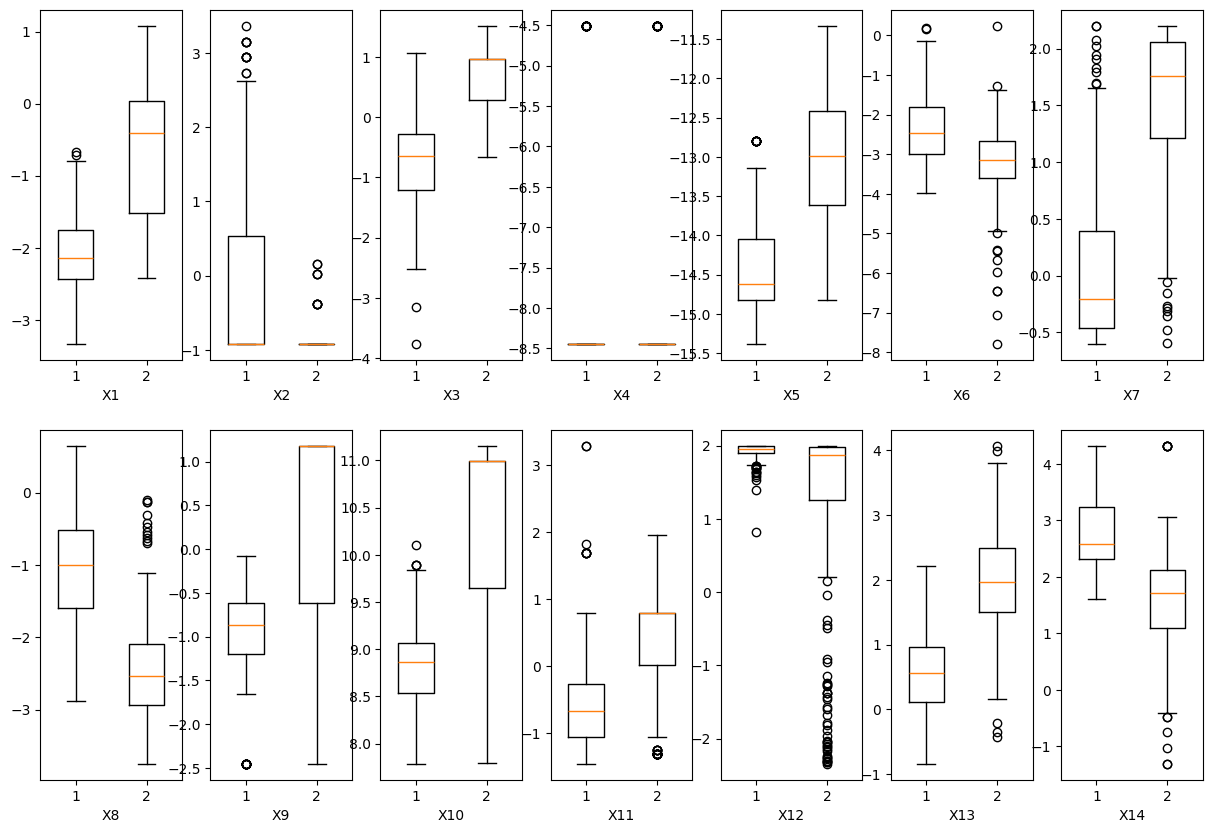

In [12]:
#  Plot 3
dat = (xt - np.mean(xt))/np.std(xt, ddof = 1, axis = 0)
dat["tree"] = tree
t3 = dat[dat["tree"] == 0]
t4 = dat[dat["tree"] == 1]

fig, axes = plt.subplots(2, 7, figsize = (15, 10))
v = 1
for i in range(0, 7):
    axes[0, i].boxplot([t3[i], t4[i]], widths=(0.5, 0.5))
    axes[0, i].set_xlabel("X" + str(v))
    v += 1
    
for i in range(0, 7):
    axes[1, i].boxplot([t3[i+7], t4[i+7]], widths=(0.5, 0.5))
    axes[1, i].set_xlabel("X" + str(v))
    v += 1
plt.show()

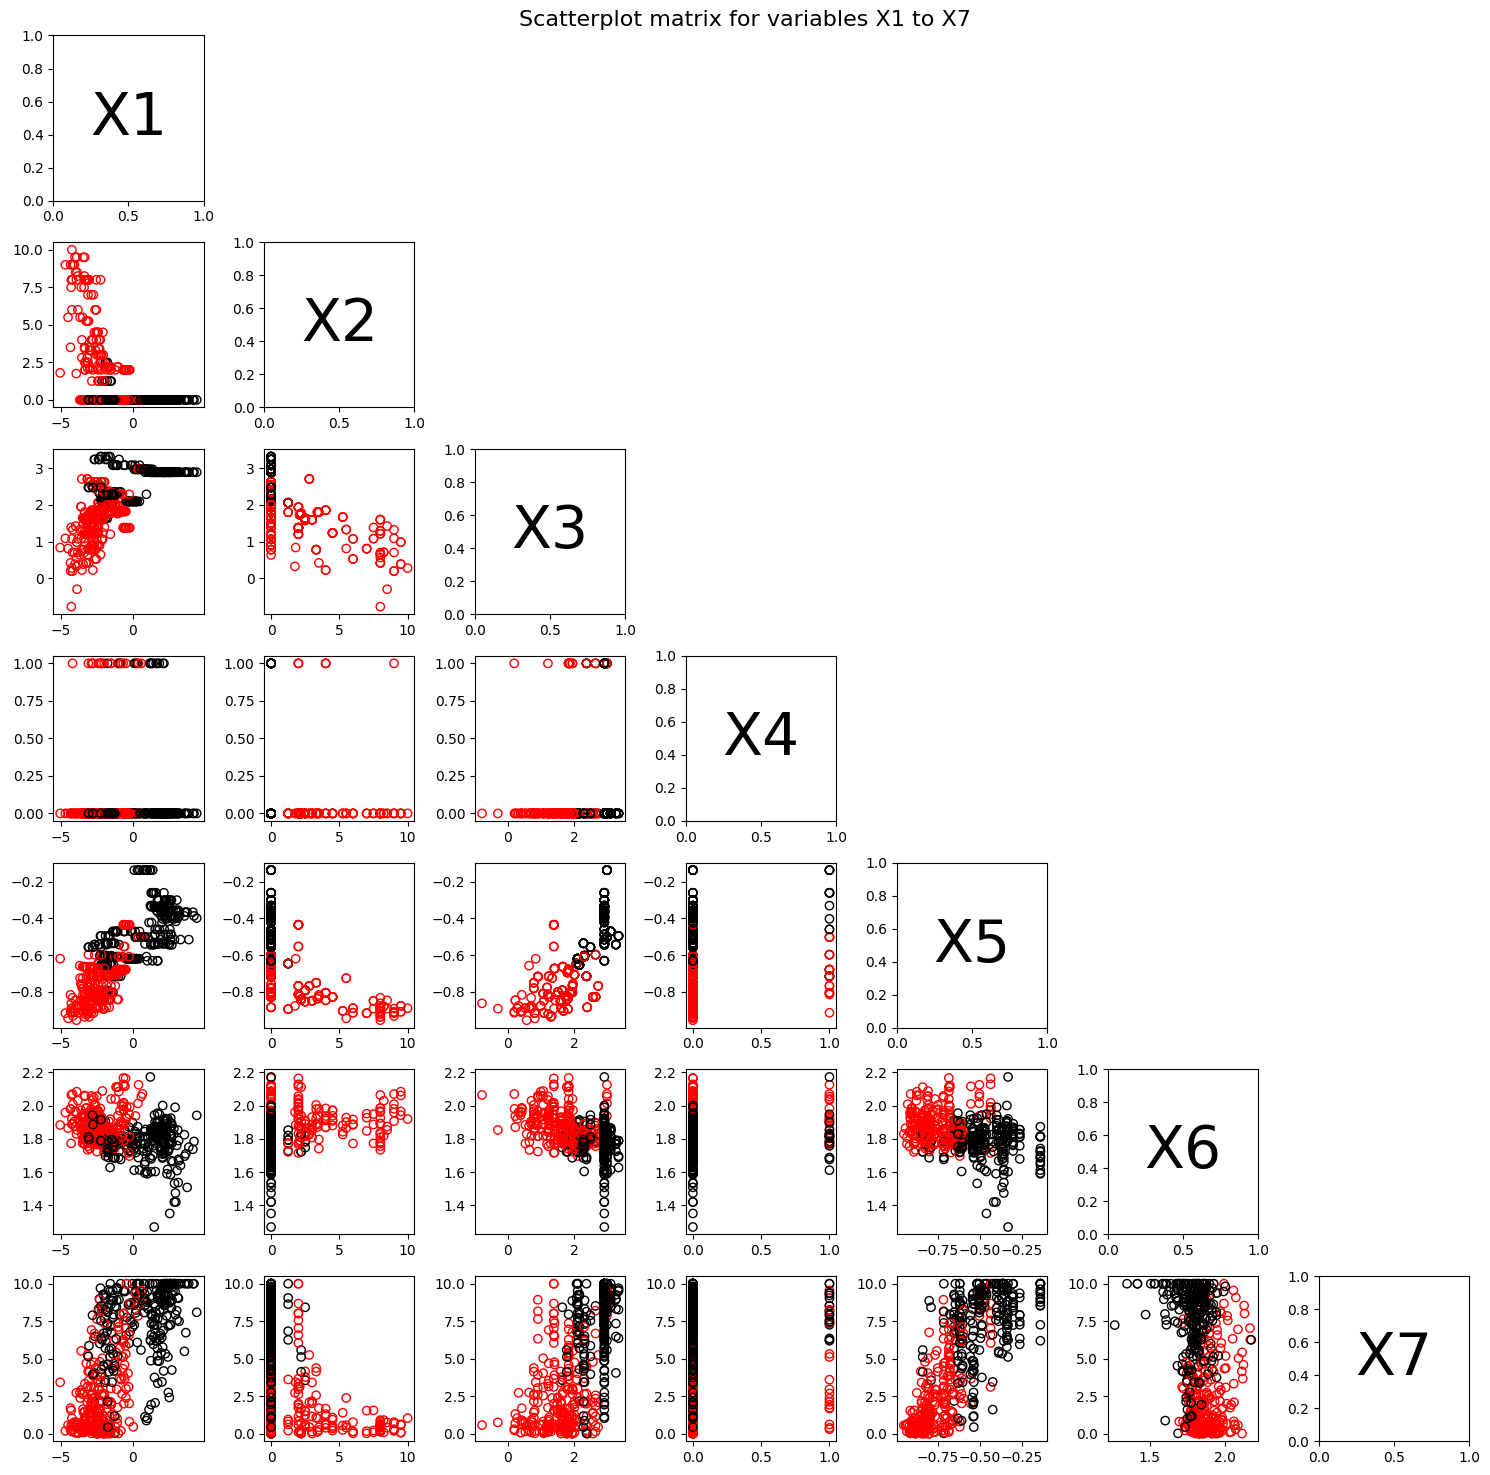

In [13]:
#  Plot 4
xt["tr"] = tree
fig, axes = plt.subplots(7, 7, figsize = (15,15))

for i in range(0, 7):
    for j in range(0, 7):
        if i == j:
            axes[i, j].text(0.5, 0.5, "X" + str(i+1), fontsize = 42,
                            horizontalalignment='center', 
                            verticalalignment='center')
        if i < j:
            axes[i,j].xaxis.set_visible(False)
            axes[i,j].yaxis.set_visible(False)
            plt.setp(axes[i,j].spines.values(), visible=False)
        if i > j:
            axes[i,j].scatter(xt[j], xt[i], 
                              edgecolors = ["red" if c == 0 else "black" for c in xt["tr"]], 
                              facecolors = "none")

plt.suptitle("Scatterplot matrix for variables X1 to X7", fontsize = 16)
fig.tight_layout()
plt.show()

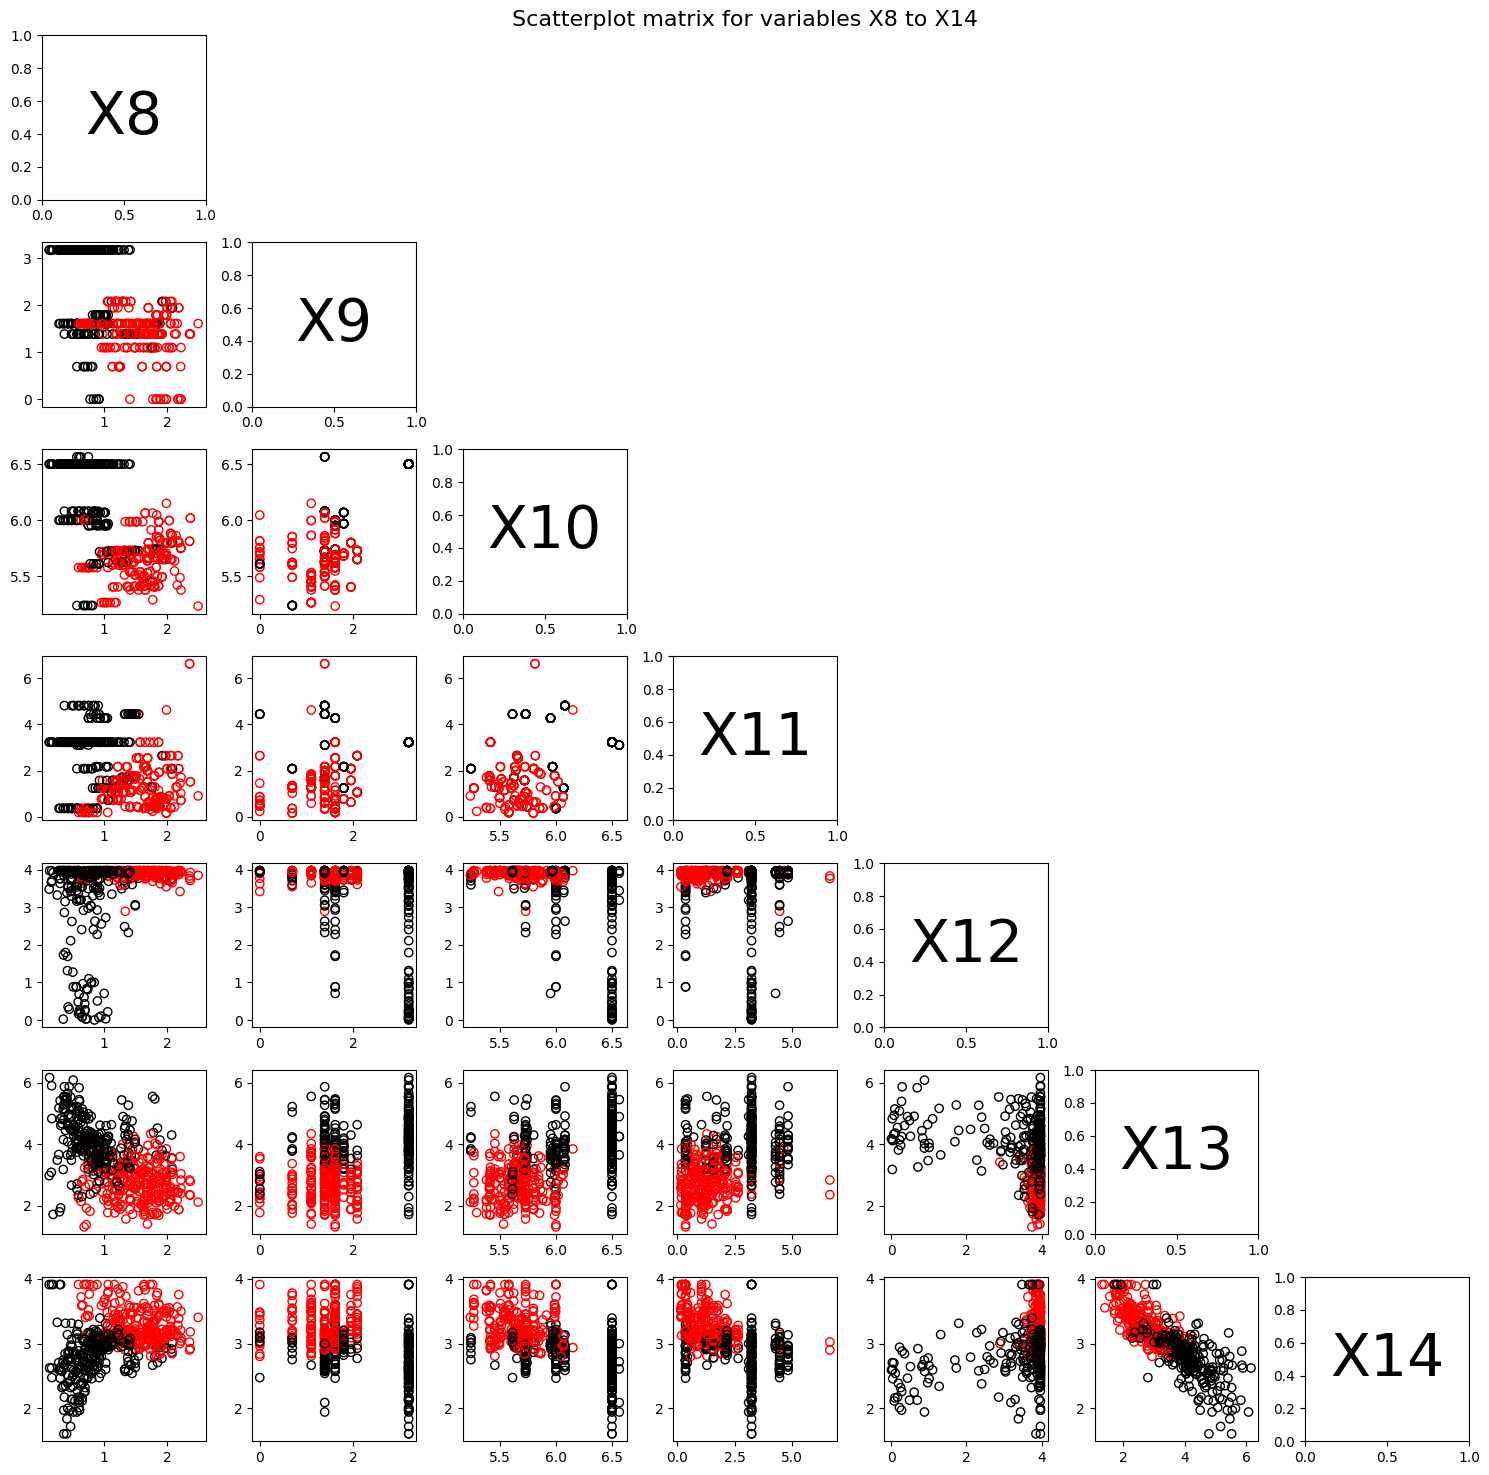

In [14]:
#  Plot 5
fig, axes = plt.subplots(7, 7, figsize = (15,15))

for i in range(0, 7):
    for j in range(0, 7):
        if i == j:
            axes[i, j].text(0.5, 0.5, "X" + str(i+8), fontsize = 42, 
                            horizontalalignment='center', 
                            verticalalignment='center')
        if i < j:
            axes[i,j].xaxis.set_visible(False)
            axes[i,j].yaxis.set_visible(False)
            plt.setp(axes[i,j].spines.values(), visible=False)
        if i > j:
            axes[i,j].scatter(xt[j+7], xt[i+7], 
                              edgecolors = ["red" if c == 0 else "black" for c in xt["tr"]], 
                              facecolors = "none")

plt.suptitle("Scatterplot matrix for variables X8 to X14", fontsize = 16)
fig.tight_layout()
plt.show()